In [23]:
from mmseg.models.utils.dalle_d_vae import get_dalle_vae, map_pixels, unmap_pixels
d_vae = get_dalle_vae(
            weight_path="/home/chenjiaqi/pj/mmsegmentation/ckp",
            device="cpu")

In [15]:
import torch
palette = torch.tensor([[222, 222, 145], [18, 30, 7], [8, 23, 47], [30, 6, 96], [1, 13, 164], [12, 28, 191], [25, 52, 32], [29, 48, 52], [15, 51, 95], [25, 56, 167], [25, 42, 210], [27, 81, 31], [9, 88, 54], [27, 92, 113], [11, 99, 151], [26, 110, 183], [24, 130, 26], [4, 122, 75], [3, 132, 98], [26, 147, 167], [17, 132, 197], [5, 169, 28], [19, 184, 67], [0, 190, 122], [12, 167, 147], [6, 161, 196], [2, 205, 3], [5, 220, 61], [23, 225, 107], [7, 217, 157], [25, 208, 191], [74, 10, 8], [69, 30, 69], [56, 4, 98], [61, 29, 164], [60, 10, 194], [60, 52, 19], [74, 69, 52], [65, 68, 116], [81, 41, 161], [70, 60, 197], [66, 81, 14], [55, 107, 61], [76, 110, 108], [74, 104, 162], [72, 94, 197], [60, 133, 16], [69, 128, 67], [59, 148, 104], [65, 133, 154], [68, 128, 183], [79, 181, 11], [76, 170, 56], [71, 175, 103], [53, 162, 137], [53, 182, 183], [51, 229, 26], [51, 202, 51], [69, 213, 122], [63, 213, 161], [71, 203, 197], [120, 11, 31], [124, 3, 68], [131, 2, 98], [113, 1, 162], [102, 13, 209], [109, 50, 30], [126, 41, 47], [107, 46, 118], [112, 49, 147], [109, 41, 189], [103, 83, 15], [126, 99, 70], [124, 101, 104], [131, 103, 159], [128, 110, 183], [119, 148, 9], [112, 137, 50], [123, 127, 116], [107, 124, 167], [102, 148, 203], [124, 180, 15], [116, 168, 65], [104, 182, 102], [111, 164, 163], [105, 174, 191], [102, 218, 20], [126, 203, 64], [108, 215, 109], [110, 221, 157], [107, 230, 192], [160, 25, 11], [165, 12, 65], [153, 2, 117], [182, 21, 141], [160, 19, 188], [176, 58, 19], [175, 58, 56], [170, 69, 93], [176, 42, 146], [157, 44, 211], [157, 105, 2], [180, 98, 73], [182, 85, 92], [169, 93, 152], [156, 89, 202], [157, 144, 22], [180, 151, 77], [154, 146, 118], [162, 136, 143], [171, 134, 184], [170, 174, 15], [178, 180, 65], [176, 183, 120], [175, 169, 147], [181, 165, 197], [156, 227, 3], [167, 218, 61], [160, 216, 119], [164, 251, 141], [177, 201, 251], [231, 30, 13], [219, 6, 59], [211, 26, 122], [216, 16, 153], [209, 12, 192], [216, 70, 15], [215, 46, 60], [234, 61, 112], [224, 53, 157], [227, 49, 207], [221, 108, 8], [220, 93, 73], [230, 111, 113], [218, 89, 143], [231, 90, 195], [227, 144, 22], [208, 137, 49], [210, 128, 116], [225, 135, 157], [221, 135, 193], [211, 174, 18], [222, 185, 50], [229, 183, 93], [233, 162, 155], [255, 167, 205], [211, 215, 15], [232, 225, 71], [0, 0, 0], [255, 255, 255], [215, 216, 196]])
num_classes = 150
def get_gt_vq_indices(gt_semantic_seg):
    gt_segmap = map_pixels(encode_to_segmap(gt_semantic_seg) / 255.0)
    return d_vae.get_codebook_indices(gt_segmap)

def encode_to_segmap(indice):
    PALETTE_ = palette.clone().to(indice.device)
    _indice = indice.clone().detach()
    _indice[_indice > num_classes] = num_classes
    return PALETTE_[_indice.long()].squeeze(1).permute(0, 3, 1, 2)


In [21]:
result_list = []
for i in range(151):
    seg_map = torch.ones(1, 1, 512, 512).cuda() * i
    indices = get_gt_vq_indices(seg_map).unsqueeze(1)
    result_list.append(torch.max(indices[0, 0, 30:35, 30:35]).item())
print(len(result_list))
print(result_list)

151
[3812, 4950, 3615, 922, 6148, 3691, 1769, 4812, 4367, 6429, 6541, 369, 7497, 7039, 7654, 6470, 7180, 2057, 3074, 3079, 7459, 832, 6327, 3242, 2466, 2640, 943, 7551, 2458, 1925, 2210, 6868, 2867, 6519, 4547, 302, 778, 541, 7695, 1673, 357, 1581, 4194, 5166, 4734, 3963, 5143, 7415, 3571, 2013, 3769, 2118, 4634, 7196, 6877, 6422, 4668, 6778, 2761, 234, 5611, 1744, 2529, 4333, 3675, 302, 7736, 3592, 5373, 4435, 6816, 933, 1566, 3189, 5417, 7534, 1584, 1929, 6237, 3146, 563, 7976, 7064, 8176, 6353, 7436, 2632, 7622, 6248, 7590, 6120, 3557, 5972, 4333, 7158, 3698, 386, 4933, 1797, 4655, 751, 4080, 3171, 1797, 1855, 2643, 7518, 6023, 3177, 4589, 2735, 7493, 746, 165, 2196, 1336, 4806, 3628, 3560, 1862, 7677, 6264, 2574, 5546, 4205, 1788, 7353, 1282, 5834, 8009, 7430, 5433, 6963, 7963, 2448, 3567, 2253, 3218, 4717, 4810, 168, 6474, 6892, 394, 350, 6754, 4815, 3197, 1774, 5032, 1334]


In [31]:
import scipy.io as sio
import torch
import glob
import numpy
import torch.nn.functional as F
def get_freq(indices):
    freq = torch.zeros(8192)
    indices = indices.flatten()
    for indice in indices:
        freq[indice] += 1
    return freq

# # 统计所有indice出现的频次，直方图
# root_path = '../work_dirs/anal/val'
root_path = '../work_dirs/bigseg_ade20k_conns_swin_160k/annal'
list = glob.glob(root_path + '/*')

data = sio.loadmat(list[12])
print(data.keys())
print('semantic_seg_pred', data['semantic_seg_pred'].shape)
print('gt_semantic_seg', data['gt_semantic_seg'].shape)
print('vq_indices', data['vq_indices'].shape)
print('vq_indice_gt', data['vq_indice_gt'].shape)

from IPython.display import display, Image

freq = get_freq(data['vq_indice_gt'])
# print('gt sum', freq.sum().item())
freq[freq != 0] = 1
print('gt indices中描述gt seg mask所用到的indice数量', freq.sum().item())
print()
pred_freq = get_freq(data['vq_indices'])
# print('gt sum', pred_freq.sum().item())
pred_freq[pred_freq != 0] = 1
print('pred indices中描述gt seg mask所用到的indice数量', pred_freq.sum().item())

def draw_segmap_from_indice(indice):
    return encode_to_segmap(F.interpolate(torch.tensor(indice).float(), 
                                          size=data['gt_semantic_seg'].shape[-2:], 
                                          mode='nearest'))[0].permute(1, 2, 0)

dict_keys(['__header__', '__version__', '__globals__', 'semantic_seg_pred', 'gt_semantic_seg', 'vq_indices', 'vq_indice_gt'])
semantic_seg_pred (1, 1, 512, 920)
gt_semantic_seg (1, 1, 512, 920)
vq_indices (1, 1, 64, 115)
vq_indice_gt (1, 1, 64, 115)
gt indices中描述gt seg mask所用到的indice数量 831.0

pred indices中描述gt seg mask所用到的indice数量 174.0


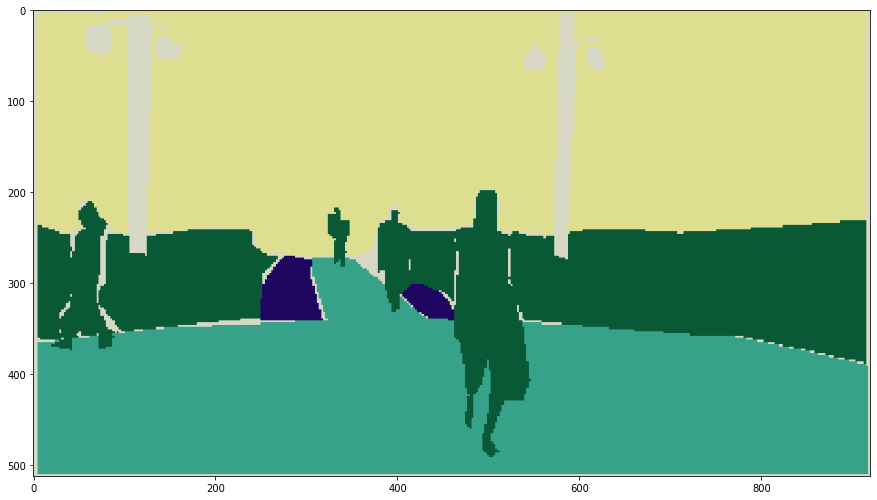

In [32]:
import matplotlib.pyplot as plt
import torch
from mmseg.models.utils.dalle_d_vae import get_dalle_vae, map_pixels, unmap_pixels
plt.figure(figsize=(15,10))
gt_seg_map = draw_segmap_from_indice(data['gt_semantic_seg'])
pred_seg_map = draw_segmap_from_indice(data['semantic_seg_pred'])
plt.imshow(gt_seg_map)
# print(data['gt_semantic_seg'])

plt.show()

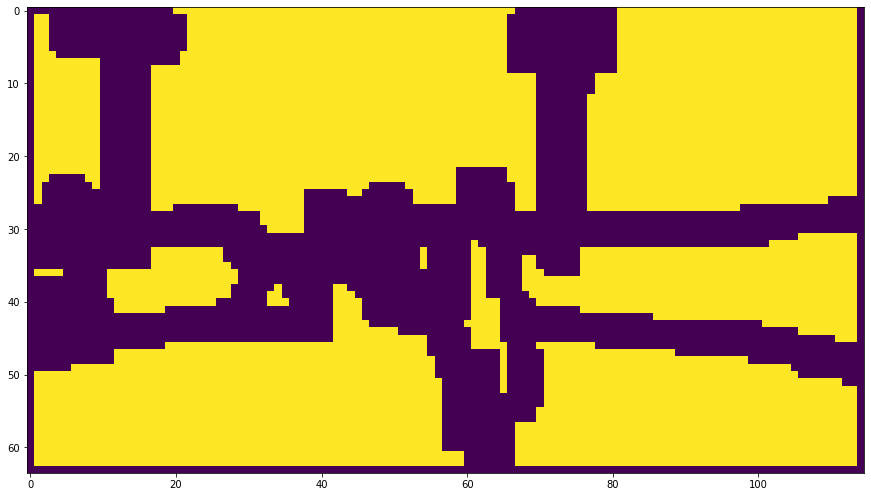

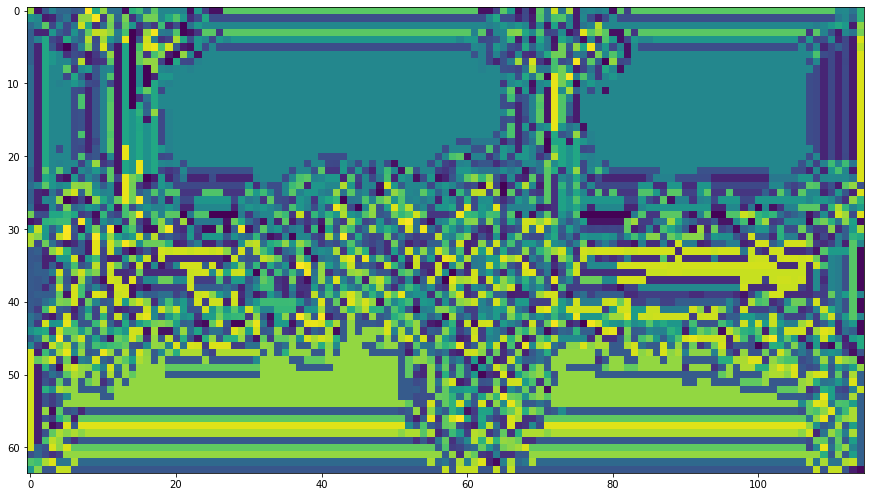

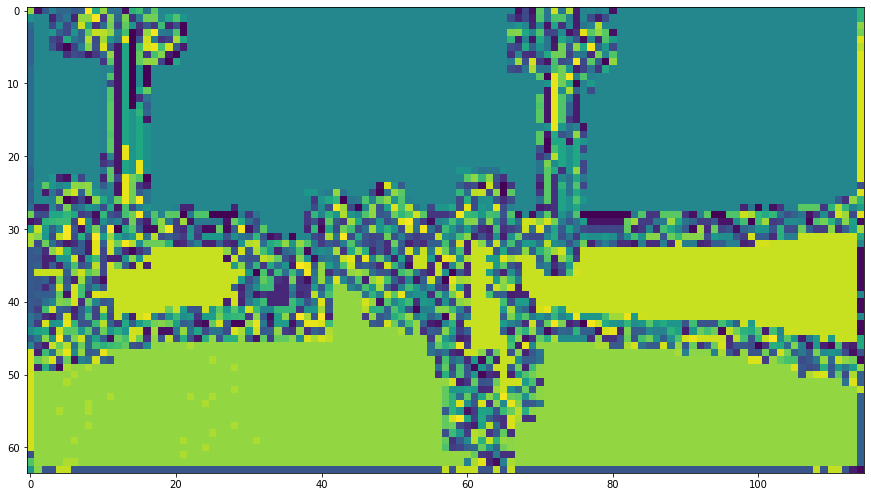

In [43]:
gt = torch.tensor(data['gt_semantic_seg']).float()
# gt[gt == 255] = 19
gt[gt == 255] = 150
# sigle_cls_indice = torch.tensor([7388, 222, 304, 2691, 6802, 2813, 1437, 5862, 1544, 1862, 2709, 2994, 7225, 7354, 3619, 5705, 3274, 4909, 1744, 1774])
# sigle_cls_indice = torch.tensor([3812, 4950, 3615, 922, 6148, 3691, 1769, 4812, 4367, 6429, 6541, 369, 7497, 7039, 7654, 6470, 7180, 2057, 3074, 3079, 7459, 832, 6327, 3242, 2466, 2640, 943, 7551, 2458, 1925, 2210, 6868, 2867, 6519, 4547, 302, 778, 541, 7695, 1673, 357, 1581, 4194, 5166, 4734, 3963, 5143, 7415, 3571, 2013, 3769, 2118, 4634, 7196, 6877, 6422, 4668, 6778, 2761, 234, 5611, 1744, 2529, 4333, 3675, 302, 7736, 3592, 5373, 4435, 6816, 933, 1566, 3189, 5417, 7534, 1584, 1929, 6237, 3146, 563, 7976, 7064, 8176, 6353, 7436, 2632, 7622, 6248, 7590, 6120, 3557, 5972, 4333, 7158, 3698, 386, 4933, 1797, 4655, 751, 4080, 3171, 1797, 1855, 2643, 7518, 6023, 3177, 4589, 2735, 7493, 746, 165, 2196, 1336, 4806, 3628, 3560, 1862, 7677, 6264, 2574, 5546, 4205, 1788, 7353, 1282, 5834, 8009, 7430, 5433, 6963, 7963, 2448, 3567, 2253, 3218, 4717, 4810, 168, 6474, 6892, 394, 350, 6754, 4815, 3197, 1774, 5032])
sigle_cls_indice = torch.tensor([3812, 4950, 3615, 922, 6148, 3691, 1769, 4812, 4367, 6429, 6541, 369, 7497, 7039, 7654, 6470, 7180, 2057, 3074, 3079, 7459, 832, 6327, 3242, 2466, 2640, 943, 7551, 2458, 1925, 2210, 6868, 2867, 6519, 4547, 302, 778, 541, 7695, 1673, 357, 1581, 4194, 5166, 4734, 3963, 5143, 7415, 3571, 2013, 3769, 2118, 4634, 7196, 6877, 6422, 4668, 6778, 2761, 234, 5611, 1744, 2529, 4333, 3675, 302, 7736, 3592, 5373, 4435, 6816, 933, 1566, 3189, 5417, 7534, 1584, 1929, 6237, 3146, 563, 7976, 7064, 8176, 6353, 7436, 2632, 7622, 6248, 7590, 6120, 3557, 5972, 4333, 7158, 3698, 386, 4933, 1797, 4655, 751, 4080, 3171, 1797, 1855, 2643, 7518, 6023, 3177, 4589, 2735, 7493, 746, 165, 2196, 1336, 4806, 3628, 3560, 1862, 7677, 6264, 2574, 5546, 4205, 1788, 7353, 1282, 5834, 8009, 7430, 5433, 6963, 7963, 2448, 3567, 2253, 3218, 4717, 4810, 168, 6474, 6892, 394, 350, 6754, 4815, 3197, 1774, 5032, 1334])
indices = get_gt_vq_indices(gt).unsqueeze(1).cpu()
avg = - F.max_pool2d(- gt, kernel_size=(32, 32), stride=(4, 4))
avg = F.interpolate(avg.float(), size=indices.shape[-2:], mode='bilinear')
ma = F.max_pool2d(gt, kernel_size=(32, 32), stride=(4, 4))
ma = F.interpolate(ma.float(), size=indices.shape[-2:], mode='bilinear')
mask = torch.zeros_like(ma)
mask[ma == avg] = 1

edited_indices = indices.clone()
edited_indices[avg == ma] = sigle_cls_indice[avg[avg == ma].long()]

# plt.figure(figsize=(15,10))
# plt.imshow(avg[0,0])
# plt.show()
# plt.figure(figsize=(15,10))
# plt.imshow(ma[0,0])
# plt.show()

plt.figure(figsize=(15,10))
plt.imshow(mask[0,0])
plt.show()

plt.figure(figsize=(15,10))
plt.imshow(indices[0, 0])
plt.show()

plt.figure(figsize=(15,10))
plt.imshow(edited_indices[0, 0])
plt.show()

In [44]:
pixel_segmap = d_vae.decode(indices, img_size=indices.shape[-2:])
pixel_segmap = unmap_pixels(torch.sigmoid(pixel_segmap[:, :3])) * 255

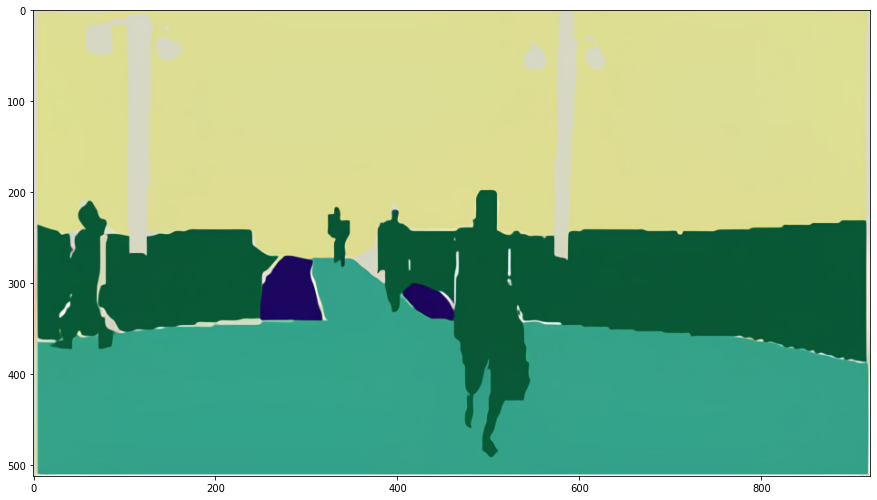

In [45]:
plt.figure(figsize=(15,10))
plt.imshow(pixel_segmap[0].permute(1, 2, 0).cpu().detach().numpy() / 255.0)
plt.show()

In [46]:
pixel_segmap_1 = d_vae.decode(edited_indices, img_size=indices.shape[-2:])
pixel_segmap_1 = unmap_pixels(torch.sigmoid(pixel_segmap_1[:, :3])) * 255

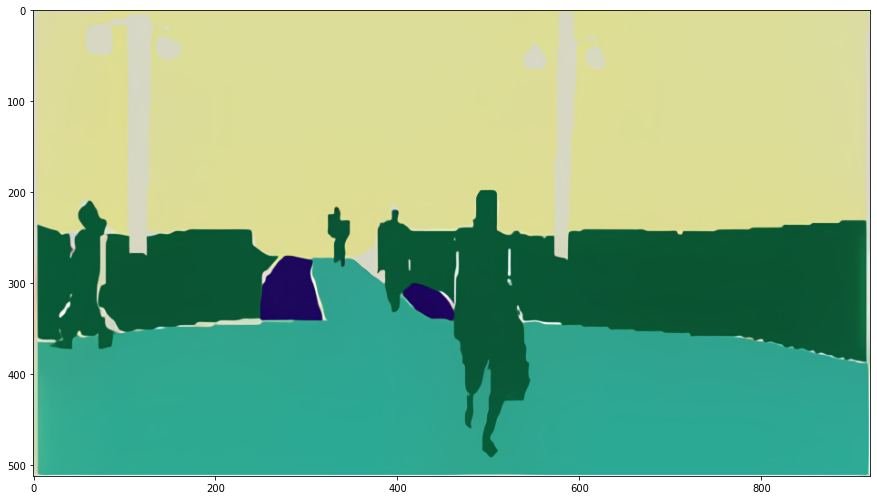

In [47]:
plt.figure(figsize=(15,10))
plt.imshow(pixel_segmap_1[0].permute(1, 2, 0).cpu().detach().numpy() / 255.0)
plt.show()